## Libraries

In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Sklearn
from sklearn.model_selection import train_test_split


In [114]:
np.random.seed(42)
random.seed(42)

## Load dataset

In [115]:
# read csv file
df = pd.read_csv(f"./survey_lung_cancer.csv")
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [116]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## missing value check

In [117]:
# check the number of missing values for each column
missing_values = df.isnull().sum()

# ouput only columns with missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)
# Check that there are no missing values ​​in the print result

Series([], dtype: int64)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## Data distribution

In [119]:
# numerical variable
numerical = ['AGE']

# categorical variable
categorical = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]
target = 'LUNG_CANCER'

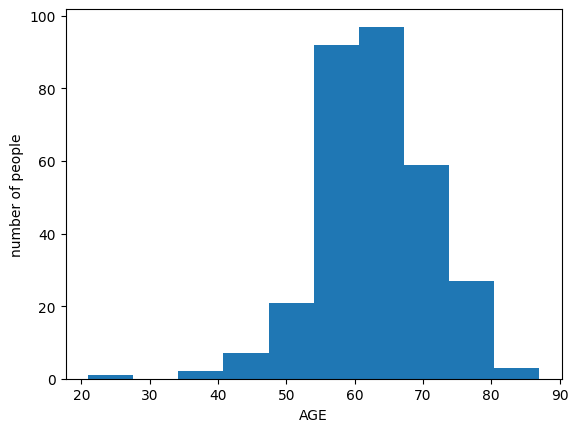

In [120]:
#look at numerical data distribution
for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



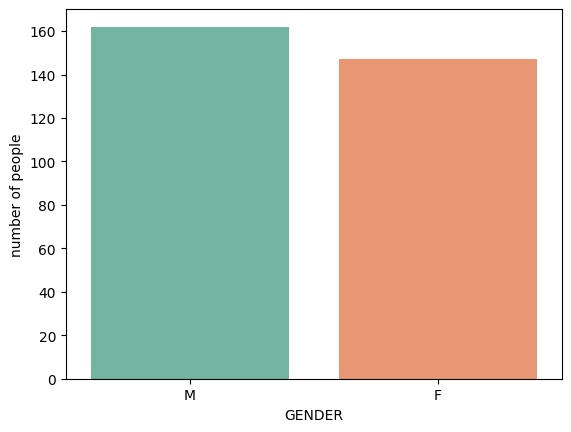

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



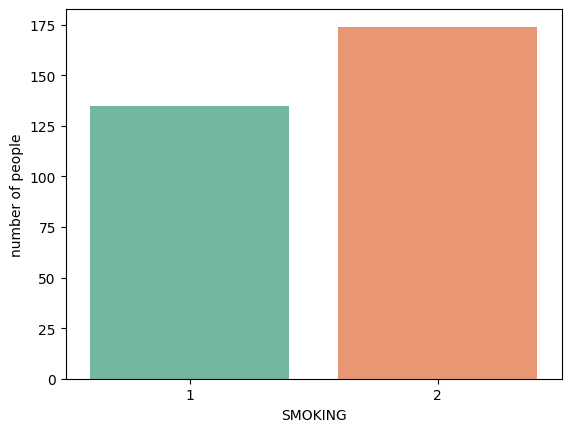

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



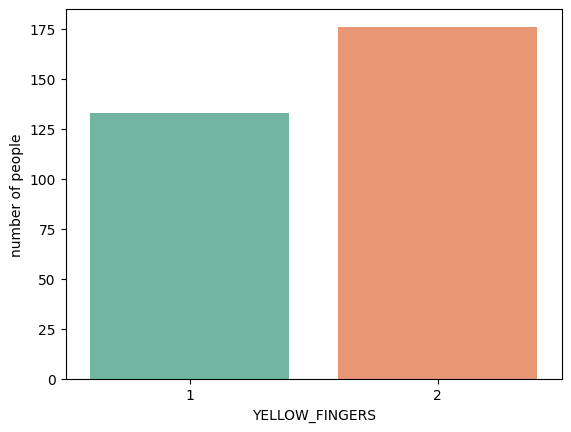

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



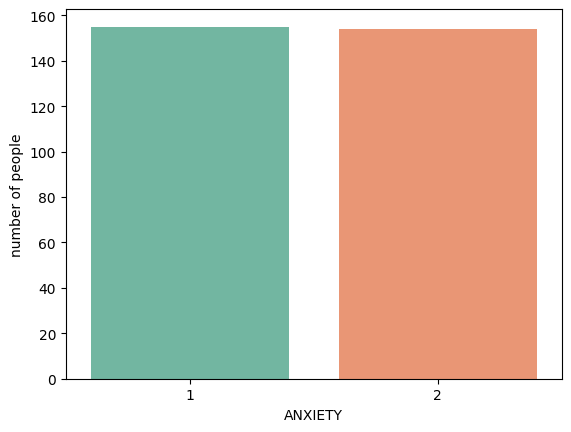

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



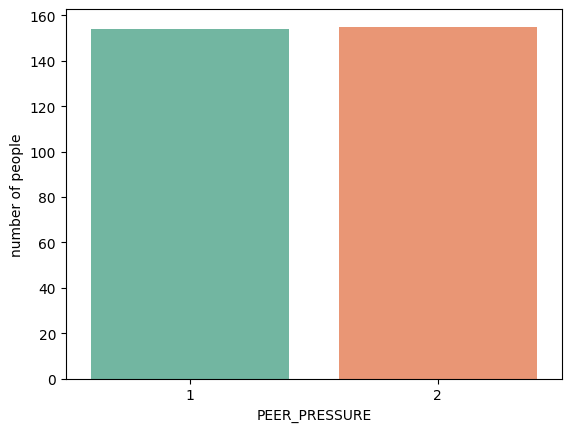

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



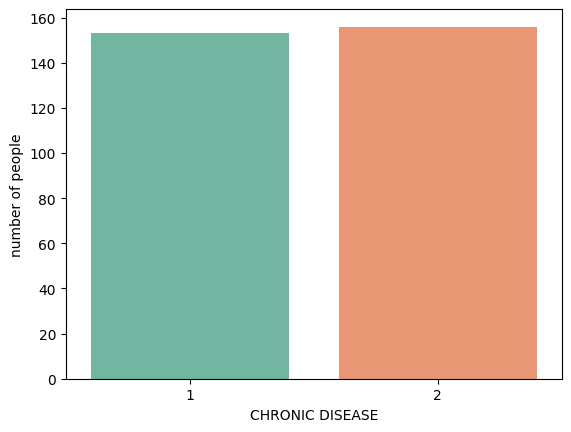

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



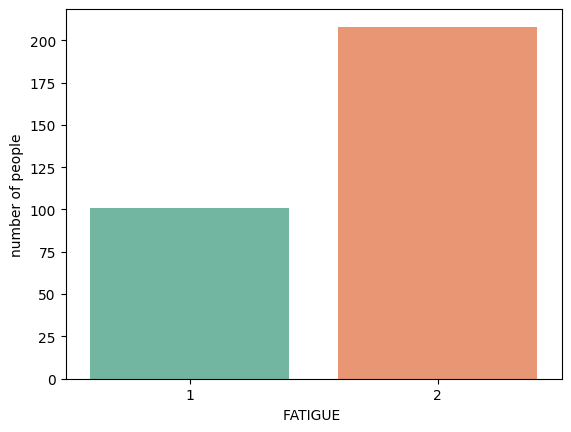

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



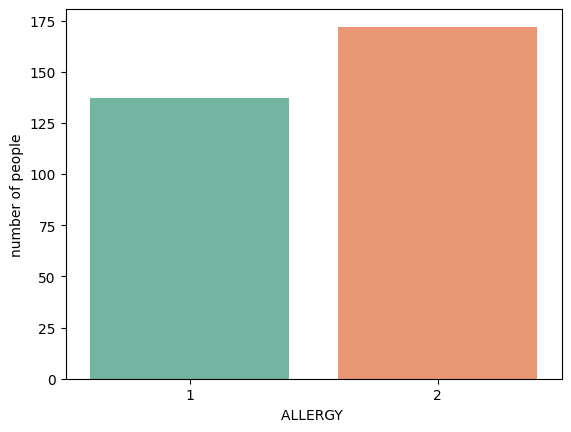

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



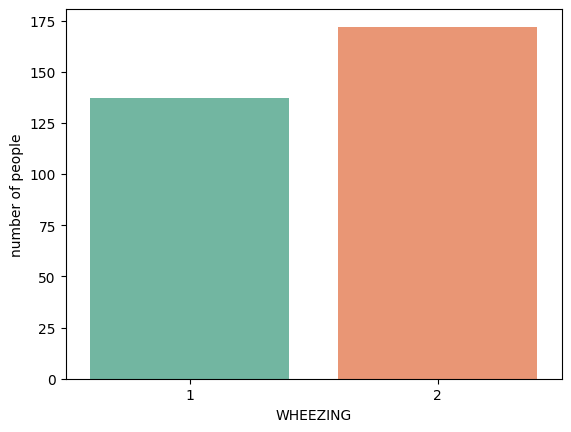

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



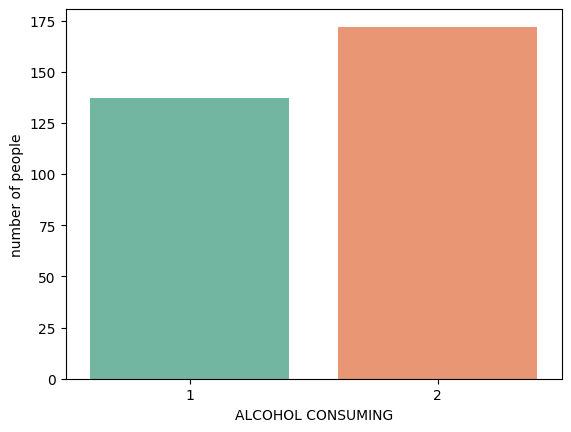

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



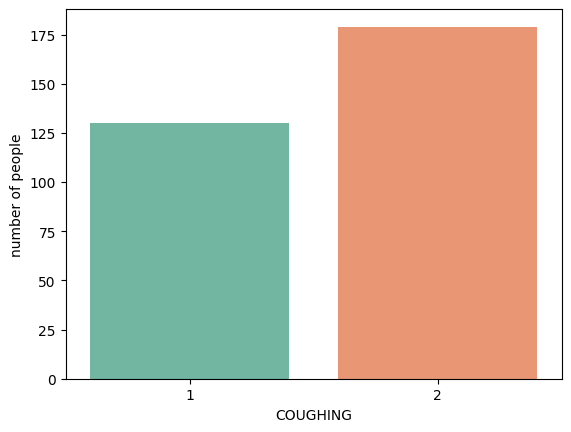

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



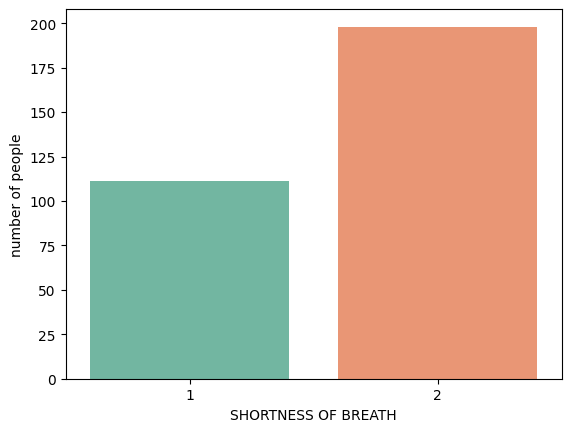

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



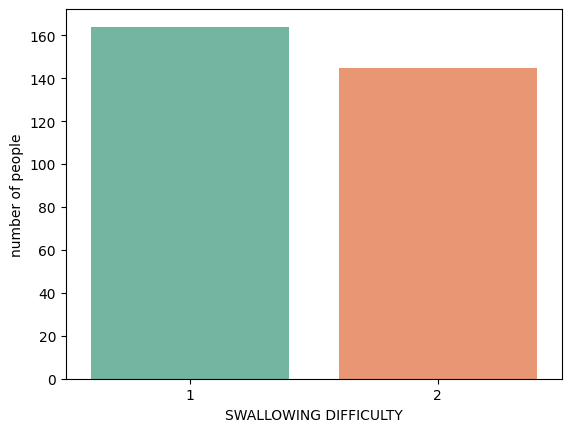

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\1340228694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



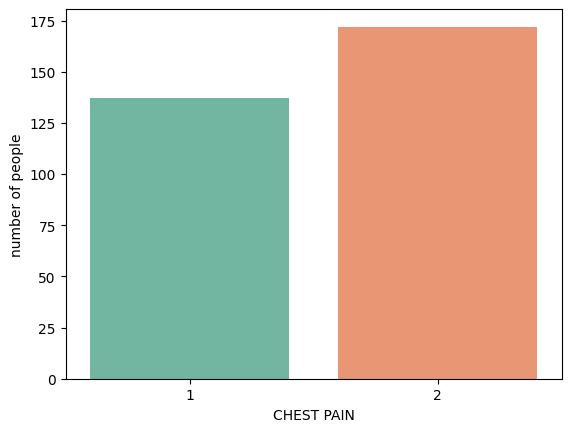

In [121]:
#look at categorical data distribution except target
for idx, i in enumerate(df[categorical].columns):
    value_counts = df[categorical][i].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("Set2", n_colors=len(value_counts)))
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\2184252331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Text(0.5, 0, 'LUNG_CANCER')

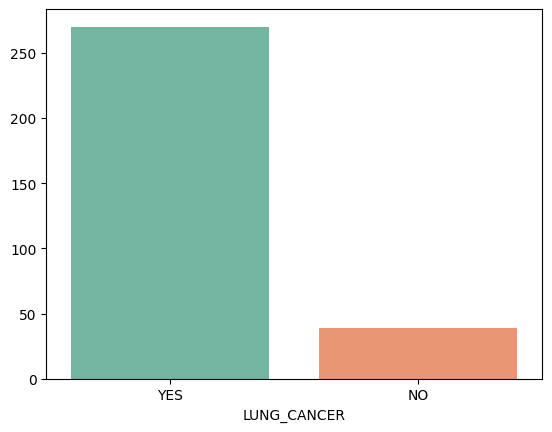

In [122]:
# target class distribution
value_counts_target = df[target].value_counts()
sns.barplot(x=value_counts_target.index, y=value_counts_target.values, palette=sns.color_palette("Set2", n_colors=len(value_counts_target)))
plt.xlabel(target)

## Transform the values

- GENDER : M / F or M / W => 0 / 1
- LUNG_CANCER :	YES / NO => 1 / 0
- Other binary variables	YES / NO => 1 / 0

In [123]:
# change the type of the valued ; string -> int not label encoding
#df.columns = [col.strip() for col in df.columns]  # remove empty space

# except fot AGE, GENDER, LUNG_CANCER columns, dealing with the rest columns
binary_cols = [col for col in df.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]

# transform the values ; 1(=NO), 2(=YES) -> 0(=NO), 1(=YES)
for col in binary_cols:
    df[col] = df[col].map({1: 0, 2: 1, '1': 0, '2': 1})  # also consider the case of containing string..

# GENDER: M → 0, W → 1
df['GENDER'] = df['GENDER'].astype(str).str.upper().map({'M': 0, 'F': 1})

# LUNG_CANCER: NO → 0, YES → 1
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(str).str.upper().map({'NO': 0, 'YES': 1})


In [124]:
print(df)
df.info()

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        0               1        1              0   
1         0   74        1               0        0              0   
2         1   59        0               0        0              1   
3         0   63        1               1        1              0   
4         1   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
304       1   56        0               0        0              1   
305       0   70        1               0        0              0   
306       0   58        1               0        0              0   
307       0   67        1               0        1              0   
308       0   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1     

## Split the dataset for train and test

In [125]:
# divide into properties(X) and target(y)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Split Train/Test (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
# stratify=y ; Divide y by maintaining the class ratio on both train and test.

In [126]:
# 결과 확인
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Train label distribution:\n", y_train.value_counts(normalize=True))
print("Test label distribution:\n", y_test.value_counts(normalize=True))

Train shape: (262, 15) (262,)
Test shape: (47, 15) (47,)
Train label distribution:
 LUNG_CANCER
1    0.874046
0    0.125954
Name: proportion, dtype: float64
Test label distribution:
 LUNG_CANCER
1    0.87234
0    0.12766
Name: proportion, dtype: float64


In [127]:
print(X.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


## Training & evaluation
- Before training and after feature selection, perform SMOTE
- Optimization by tuning model parameters
- Since it is a binary classification problem, the classifier model is considered.

In [128]:
from imblearn.over_sampling import SMOTENC
from supervised.automl import AutoML
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             precision_score, recall_score,
                             precision_recall_curve, auc,
                             balanced_accuracy_score, matthews_corrcoef)

# categorical feature idx
categorical_indices = [i for i, col in enumerate(X_train.columns) if col!='AGE']
random_state = 42

# Data Split -> SMOTENC -> AutoML 
smote = SMOTENC(categorical_features=categorical_indices, random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [129]:
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import pandas as pd

# available metrics list for training 
metrics_explain = ["logloss", "f1", "auc", "accuracy", "average_precision"]

# trained model, prediction result, dict for performance saving
automl_models_explain = {}
predictions_explain = {}
test_scores_explain = {}

for metric in metrics_explain:
    print(f"\n▶ Training AutoML (Explain) with eval_metric = '{metric}'")

    # AutoML execution
    automl_explain = AutoML(
        mode="Explain", 
        total_time_limit=1000,
        results_path=f"AutoML_results_explain_{metric}",
        eval_metric=metric
    )
    automl_explain.fit(X_resampled, y_resampled)
    
    # generate report - README.html
    automl_explain.report()

    # prediction
    automl_models_explain[metric] = automl_explain
    preds = automl_explain.predict(X_test)
    predictions_explain[metric] = preds

    # test performance evaluaion
    try:
        auc_score = roc_auc_score(y_test, preds)
    except:
        auc_score = "N/A"

    try:
        ap_score = average_precision_score(y_test, preds)
    except:
        ap_score = "N/A"

    test_scores_explain[metric] = {
        "Accuracy": accuracy_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "ROC AUC": auc_score,
        "Average Precision": ap_score
    }

# print reslut table
df_explain_results = pd.DataFrame(test_scores_explain).T
print("\n Test Set Evaluation Results (Explain mode):")
display(df_explain_results)



▶ Training AutoML (Explain) with eval_metric = 'logloss'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Explain) with eval_metric = 'f1'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Explain) with eval_metric = 'auc'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Explain) with eval_metric = 'accuracy'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Explain) with eval_metric = 'average_precision'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

 Test Set Evaluation Results (Explain mode):


,Accuracy,F1 Score,Precision,Recall,ROC AUC,Average Precision
logloss,0.851064,0.909091,0.972222,0.853659,0.843496,0.957605
f1,0.872340,0.931818,0.872340,1.000000,0.500000,0.872340
auc,0.787234,0.871795,0.918919,0.829268,0.664634,0.910966
accuracy,0.829787,0.897436,0.945946,0.853659,0.760163,0.935174
average_precision,0.787234,0.871795,0.918919,0.829268,0.664634,0.910966


In [130]:
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import pandas as pd

# available metrics list for training 
metrics_perform = ["logloss", "f1", "auc", "accuracy", "average_precision"]

# trained model and dict for prediction result saving
automl_models_perform = {}
predictions_perform= {}
test_scores_perform = {}

for metric in metrics_perform:
    print(f"\n▶ Training AutoML (Perform) with eval_metric = '{metric}'")
    
    # execute AutoML 
    automl_perform= AutoML(
        mode="Perform",
        total_time_limit=1500,
        results_path=f"AutoML_results_perform_{metric}",
        eval_metric=metric
    )
    automl_perform.fit(X_resampled, y_resampled)
    
    # generate reprot - README.html
    automl_perform.report()

    # save the models and preds
    automl_models_perform[metric] = automl_perform
    preds_perform = automl_perform.predict(X_test)
    predictions_perform[metric] = preds_perform

    # test performance evaluaion
    try:
        auc_score = roc_auc_score(y_test, preds_perform)
    except:
        auc_score = "N/A"

    try:
        ap_score = average_precision_score(y_test, preds_perform)
    except:
        ap_score = "N/A"

    test_scores_perform[metric] = {
        "Accuracy": accuracy_score(y_test, preds_perform),
        "F1 Score": f1_score(y_test, preds_perform),
        "Precision": precision_score(y_test, preds_perform),
        "Recall": recall_score(y_test, preds_perform),
        "ROC AUC": auc_score,
        "Average Precision": ap_score
    }

# print result table
df_compete_results = pd.DataFrame(test_scores_perform).T
print("\n Test Set Evaluation Results (by metric):")
display(df_compete_results)



▶ Training AutoML (Perform) with eval_metric = 'logloss'
AutoML directory: AutoML_results_perform_logloss
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Linear', 'Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_Linear logloss 0.192042 trained in 13.46 seconds (1-sample predict time 0.042 seconds)
* Step default_algorithms will try to check up to 5 models
2_Default_LightGBM logloss 0.13902 trained in 5.26 seconds (1-sample predict time 0.0168 seconds)
3_Default_Xgboost logloss 0.1365 trained in 7.3 seconds (1-sample predict time 0.016 seconds)
4_Default_CatBoost logloss 0.125332 trained in 4.48 seconds (1-sample predict time 0.0165 sec

c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

4_Default_CatBoost average_precision 0.987349 trained in 33.35 seconds (1-sample predict time 0.0333 seconds)
5_Default_NeuralNetwork average_precision 0.971355 trained in 31.5 seconds (1-sample predict time 0.0405 seconds)
6_Default_RandomForest average_precision 0.978456 trained in 34.96 seconds (1-sample predict time 0.1487 seconds)
* Step not_so_random will try to check up to 20 models
11_LightGBM average_precision 0.984562 trained in 34.02 seconds (1-sample predict time 0.0148 seconds)
7_Xgboost average_precision 0.981538 trained in 34.4 seconds (1-sample predict time 0.0137 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

15_CatBoost average_precision 0.988065 trained in 34.77 seconds (1-sample predict time 0.0174 seconds)
19_RandomForest average_precision 0.987365 trained in 37.49 seconds (1-sample predict time 0.1872 seconds)
23_NeuralNetwork average_precision 0.978522 trained in 32.13 seconds (1-sample predict time 0.0313 seconds)
12_LightGBM average_precision 0.981605 trained in 33.75 seconds (1-sample predict time 0.0182 seconds)
8_Xgboost average_precision 0.979431 trained in 32.85 seconds (1-sample predict time 0.0192 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

16_CatBoost average_precision 0.981597 trained in 35.4 seconds (1-sample predict time 0.0246 seconds)
20_RandomForest average_precision 0.984126 trained in 36.46 seconds (1-sample predict time 0.1341 seconds)
24_NeuralNetwork average_precision 0.976907 trained in 34.07 seconds (1-sample predict time 0.037 seconds)
13_LightGBM average_precision 0.985243 trained in 35.18 seconds (1-sample predict time 0.0128 seconds)
9_Xgboost average_precision 0.911635 trained in 34.15 seconds (1-sample predict time 0.0144 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

17_CatBoost average_precision 0.980034 trained in 35.62 seconds (1-sample predict time 0.0179 seconds)
21_RandomForest average_precision 0.968446 trained in 38.78 seconds (1-sample predict time 0.1381 seconds)
25_NeuralNetwork average_precision 0.969369 trained in 33.97 seconds (1-sample predict time 0.0367 seconds)
14_LightGBM average_precision 0.982671 trained in 35.65 seconds (1-sample predict time 0.0127 seconds)
10_Xgboost average_precision 0.500365 trained in 33.04 seconds (1-sample predict time 0.0145 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

18_CatBoost average_precision 0.985217 trained in 35.74 seconds (1-sample predict time 0.0169 seconds)
22_RandomForest average_precision 0.973307 trained in 37.4 seconds (1-sample predict time 0.1672 seconds)
26_NeuralNetwork average_precision 0.97895 trained in 33.38 seconds (1-sample predict time 0.0343 seconds)
* Step golden_features will try to check up to 3 models
None 10
Add Golden Feature: ALLERGY _sum_PEER_PRESSURE
Add Golden Feature: SWALLOWING DIFFICULTY_sum_ALLERGY 
Add Golden Feature: ALCOHOL CONSUMING_sum_PEER_PRESSURE
Add Golden Feature: WHEEZING_sum_ALLERGY 
Add Golden Feature: SWALLOWING DIFFICULTY_sum_COUGHING
Add Golden Feature: ALLERGY _sum_YELLOW_FINGERS
Add Golden Feature: CHEST PAIN_sum_PEER_PRESSURE
Add Golden Feature: COUGHING_sum_ALLERGY 
Add Golden Feature: SWALLOWING DIFFICULTY_sum_ALCOHOL CONSUMING
Add Golden Feature: ALCOHOL CONSUMING_sum_ALLERGY 
Created 10 Golden Features in 0.25 seconds.


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

15_CatBoost_GoldenFeatures average_precision 0.987348 trained in 38.59 seconds (1-sample predict time 0.0404 seconds)
19_RandomForest_GoldenFeatures average_precision 0.981939 trained in 39.42 seconds (1-sample predict time 0.1546 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

4_Default_CatBoost_GoldenFeatures average_precision 0.989526 trained in 36.88 seconds (1-sample predict time 0.0374 seconds)
Not enough time to perform features selection. Skip
Time needed for features selection ~ 219.0 seconds
Please increase total_time_limit to at least (2248 seconds) to have features selection
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 18 models


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

27_CatBoost_GoldenFeatures average_precision 0.99044 trained in 36.23 seconds (1-sample predict time 0.0348 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

28_CatBoost average_precision 0.97874 trained in 36.74 seconds (1-sample predict time 0.013 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

29_CatBoost average_precision 0.990262 trained in 37.42 seconds (1-sample predict time 0.0183 seconds)
30_RandomForest average_precision 0.986077 trained in 39.42 seconds (1-sample predict time 0.1715 seconds)
31_RandomForest average_precision 0.985326 trained in 39.62 seconds (1-sample predict time 0.1417 seconds)
32_LightGBM average_precision 0.985875 trained in 36.88 seconds (1-sample predict time 0.0113 seconds)
33_LightGBM average_precision 0.984718 trained in 37.05 seconds (1-sample predict time 0.0159 seconds)
34_LightGBM average_precision 0.9859 trained in 36.33 seconds (1-sample predict time 0.0113 seconds)
* Step hill_climbing_2 will try to check up to 17 models


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

35_CatBoost_GoldenFeatures average_precision 0.989239 trained in 37.47 seconds (1-sample predict time 0.0364 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

36_CatBoost_GoldenFeatures average_precision 0.986614 trained in 38.06 seconds (1-sample predict time 0.0388 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

37_CatBoost average_precision 0.985173 trained in 37.5 seconds (1-sample predict time 0.0144 seconds)


c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxes, target, weight):
        <source elided>

        return -negative_average_precision(target, preds, weight), 0
        ^

During: Pass nopython_type_inference
c:\Users\jin89\MLOps_practice\Assignment_2\env2\Lib\site-packages\catboost\core.py:1790: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'negative_average_precision': Cannot determine Numba type of <class 'function'>

File "env2\Lib\site-packages\supervised\utils\metric.py", line 281:
    def evaluate(self, approxe

38_CatBoost average_precision 0.981361 trained in 38.33 seconds (1-sample predict time 0.0157 seconds)
* Step ensemble will try to check up to 1 model
Ensemble average_precision 0.992985 trained in 2.69 seconds (1-sample predict time 0.1873 seconds)
AutoML fit time: 1517.96 seconds
AutoML best model: Ensemble

 Test Set Evaluation Results (by metric):


,Accuracy,F1 Score,Precision,Recall,ROC AUC,Average Precision
logloss,0.851064,0.915663,0.904762,0.926829,0.630081,0.902390
f1,0.872340,0.921053,1.000000,0.853659,0.926829,0.981318
auc,0.872340,0.926829,0.926829,0.926829,0.713415,0.922842
accuracy,0.872340,0.921053,1.000000,0.853659,0.926829,0.981318
average_precision,0.872340,0.926829,0.926829,0.926829,0.713415,0.922842


In [131]:
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import pandas as pd

# available metrics list for training 
metrics_compete = ["logloss", "f1", "auc", "accuracy", "average_precision"]

# trained model and dict for prediction result saving
automl_models_compete = {}
predictions_compete = {}
test_scores_compete = {}

for metric in metrics_compete:
    print(f"\n▶ Training AutoML (Compete) with eval_metric = '{metric}'")
    
    # execute AutoML 
    automl_compete = AutoML(
        mode="Compete",
        total_time_limit=2000,
        results_path=f"AutoML_results_compete_{metric}",
        eval_metric=metric
    )
    automl_compete.fit(X_resampled, y_resampled)
    
    # generate reprot - README.html
    automl_compete.report()

    # save the models and preds
    automl_models_compete[metric] = automl_compete
    preds_compete = automl_compete.predict(X_test)
    predictions_compete[metric] = preds_compete

    # test performance evaluaion
    try:
        auc_score = roc_auc_score(y_test, preds_compete)
    except:
        auc_score = "N/A"

    try:
        ap_score = average_precision_score(y_test, preds_compete)
    except:
        ap_score = "N/A"

    test_scores_compete[metric] = {
        "Accuracy": accuracy_score(y_test, preds_compete),
        "F1 Score": f1_score(y_test, preds_compete),
        "Precision": precision_score(y_test, preds_compete),
        "Recall": recall_score(y_test, preds_compete),
        "ROC AUC": auc_score,
        "Average Precision": ap_score
    }

# print result table
df_compete_results = pd.DataFrame(test_scores_compete).T
print("\n Test Set Evaluation Results (by metric):")
display(df_compete_results)



▶ Training AutoML (Compete) with eval_metric = 'logloss'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Compete) with eval_metric = 'f1'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Compete) with eval_metric = 'auc'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Compete) with eval_metric = 'accuracy'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

▶ Training AutoML (Compete) with eval_metric = 'average_precision'
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.

 Test Set Evaluation Results (by metric):


,Accuracy,F1 Score,Precision,Recall,ROC AUC,Average Precision
logloss,0.851064,0.915663,0.904762,0.926829,0.630081,0.902390
f1,0.872340,0.925000,0.948718,0.902439,0.784553,0.941266
auc,0.872340,0.926829,0.926829,0.926829,0.713415,0.922842
accuracy,0.851064,0.909091,0.972222,0.853659,0.843496,0.957605
average_precision,0.829787,0.900000,0.923077,0.878049,0.689024,0.916890


## Artifacts analysis

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Explain mode


 Analyzing results in: AutoML_results_explain_logloss

Metric Table:


,metric_type,logloss
name,model_type,
1_Baseline,Baseline,0.693177
2_DecisionTree,Decision Tree,0.313620
3_Linear,Linear,0.163214
4_Default_Xgboost,Xgboost,0.065376
5_Default_NeuralNetwork,Neural Network,0.121825
6_Default_RandomForest,Random Forest,0.203171
Ensemble,Ensemble,0.065376


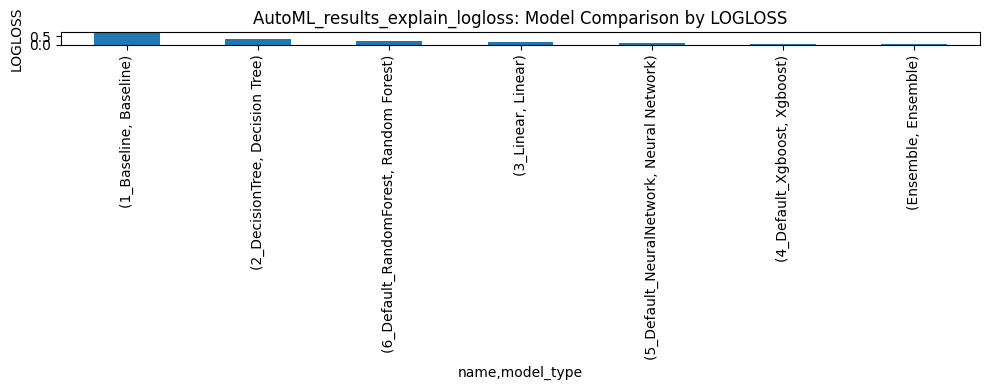

 No Correlation Heatmap.

 Analyzing results in: AutoML_results_explain_f1

Metric Table:


,metric_type,f1
name,model_type,
1_Baseline,Baseline,0.000000
2_DecisionTree,Decision Tree,0.877193
3_Linear,Linear,0.945455
4_Default_Xgboost,Xgboost,0.973451
5_Default_NeuralNetwork,Neural Network,0.948276
6_Default_RandomForest,Random Forest,0.932203
Ensemble,Ensemble,0.973451


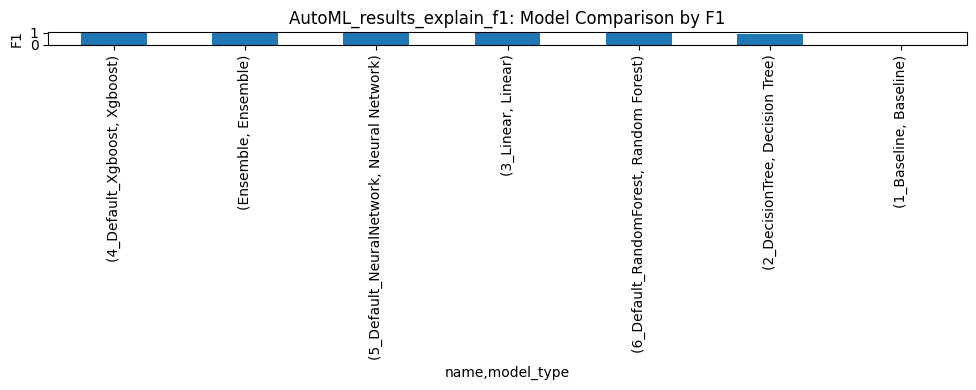

 No Correlation Heatmap.

 Analyzing results in: AutoML_results_explain_auc

Metric Table:


,metric_type,auc
name,model_type,
1_Baseline,Baseline,0.500000
2_DecisionTree,Decision Tree,0.924682
3_Linear,Linear,0.980944
4_Default_Xgboost,Xgboost,1.000000
5_Default_NeuralNetwork,Neural Network,0.990926
6_Default_RandomForest,Random Forest,0.984876
Ensemble,Ensemble,1.000000


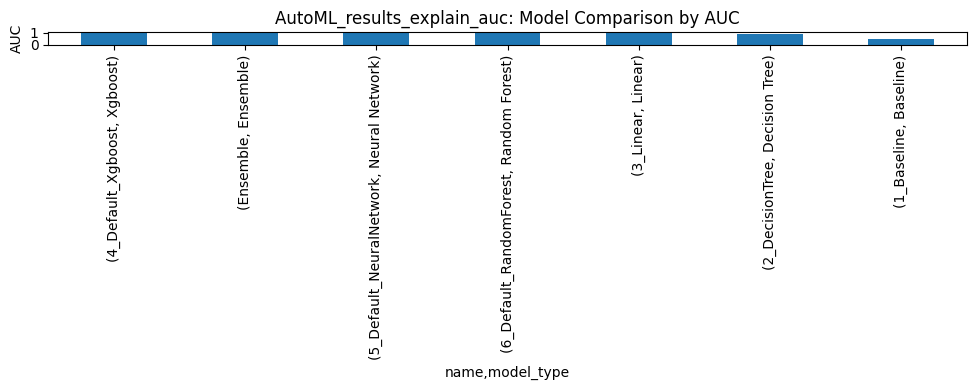

 No Correlation Heatmap.

 Analyzing results in: AutoML_results_explain_accuracy

Metric Table:


,metric_type,accuracy
name,model_type,
1_Baseline,Baseline,0.495652
2_DecisionTree,Decision Tree,0.878261
3_Linear,Linear,0.947826
4_Default_Xgboost,Xgboost,0.973913
5_Default_NeuralNetwork,Neural Network,0.947826
6_Default_RandomForest,Random Forest,0.930435
Ensemble,Ensemble,0.973913


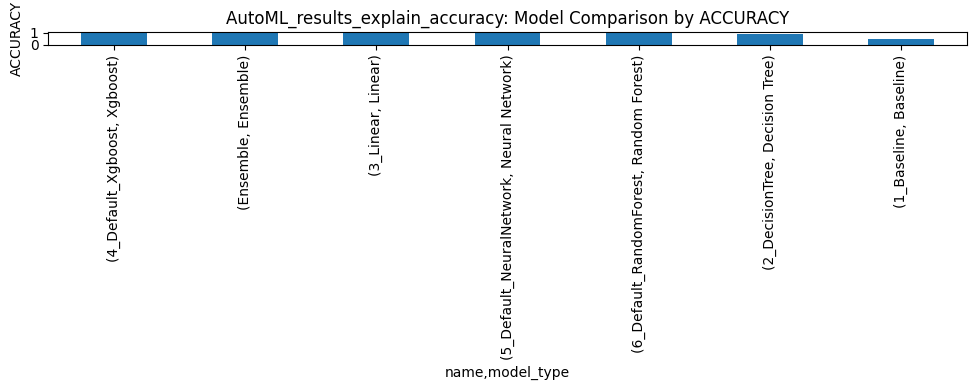

 No Correlation Heatmap.
[ X ] AutoML_results_explain_precision → No leaderboard.csv . pass.
[ X ] AutoML_results_explain_recall → No leaderboard.csv . pass.


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import glob

# Specify folders where multiple metric experiment results are stored 
results_folders = [
    "AutoML_results_explain_logloss",
    "AutoML_results_explain_f1",
    "AutoML_results_explain_auc",
    "AutoML_results_explain_accuracy",
    "AutoML_results_explain_precision",
    "AutoML_results_explain_recall"
]

for results_path in results_folders:
    if not os.path.exists(os.path.join(results_path, "leaderboard.csv")):
        print(f"[ X ] {results_path} → No leaderboard.csv . pass.")
        continue

    print(f"\n Analyzing results in: {results_path}\n")

    # 1. Load Leaderboard
    leaderboard = pd.read_csv(os.path.join(results_path, "leaderboard.csv"))

    # 2. Check metric_type type and pivot
    metric_types = leaderboard["metric_type"].unique()
    pivot = leaderboard.pivot_table(index=["name", "model_type"], 
                                     columns="metric_type", 
                                     values="metric_value")
    print("Metric Table:")
    display(pivot)

    # 3.Visualize performance by metric
    for metric in metric_types:
        if metric in pivot.columns:
            pivot[metric].sort_values(ascending=False).plot(kind="bar", figsize=(10, 4), title=f"{results_path}: Model Comparison by {metric.upper()}")
            plt.ylabel(metric.upper())
            plt.tight_layout()
            plt.show()

    # 4. Importance Image Visualization
    importance_imgs = glob.glob(os.path.join(results_path, "*", "importance.png"))
    for img_path in importance_imgs:
        model_name = os.path.basename(os.path.dirname(img_path))
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{results_path} - {model_name} (Importance)")
        plt.show()

    # 5. Correlation Heatmap
    corr_path = os.path.join(results_path, "correlation_matrix.csv")
    if os.path.exists(corr_path):
        corr_df = pd.read_csv(corr_path, index_col=0)
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_df, annot=True, cmap="coolwarm")
        plt.title(f"{results_path} - Feature Correlation")
        plt.tight_layout()
        plt.show()
    else:
        print(" No Correlation Heatmap.")


## Perform Mode


 Analyzing results in: AutoML_results_perform_logloss

Metric Table:


,metric_type,logloss
name,model_type,
10_Xgboost,Xgboost,0.693123
11_LightGBM,LightGBM,0.152876
12_LightGBM,LightGBM,0.130602
12_LightGBM_SelectedFeatures,LightGBM,0.126824
13_LightGBM,LightGBM,0.140203
...,...,...
6_Default_RandomForest,Random Forest,0.236473
7_Xgboost,Xgboost,0.171097
8_Xgboost,Xgboost,0.136940


C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\3564664791.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


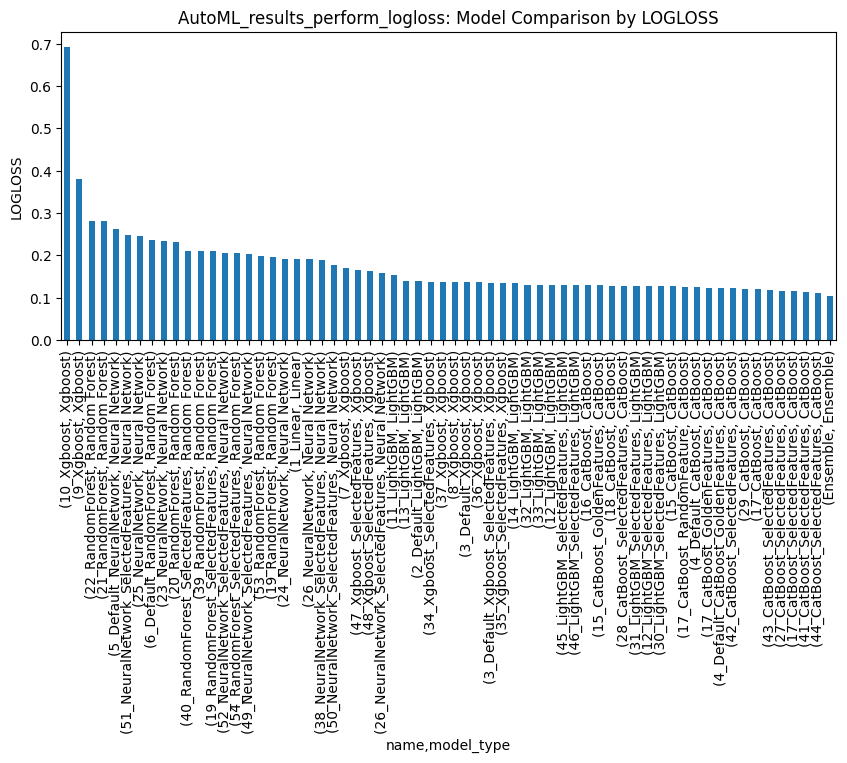

 No Correlation Heatmap.

 Analyzing results in: AutoML_results_perform_f1

Metric Table:


,metric_type,f1
name,model_type,
10_Xgboost,Xgboost,0.666667
11_LightGBM,LightGBM,0.940171
12_LightGBM,LightGBM,0.967177
12_LightGBM_GoldenFeatures,LightGBM,0.962306
12_LightGBM_RandomFeature,LightGBM,0.964602
13_LightGBM,LightGBM,0.966741
14_LightGBM,LightGBM,0.966887
14_LightGBM_GoldenFeatures,LightGBM,0.964602
15_CatBoost,CatBoost,0.964444


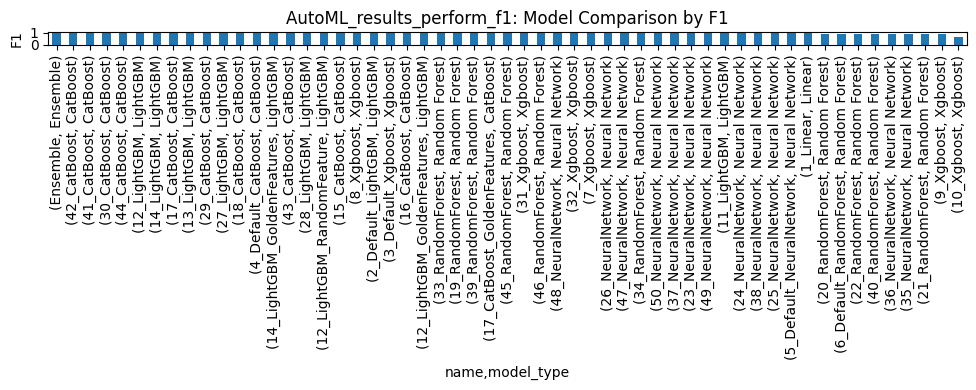

 No Correlation Heatmap.

 Analyzing results in: AutoML_results_perform_auc

Metric Table:


,metric_type,auc
name,model_type,
10_Xgboost,Xgboost,0.500868
11_LightGBM,LightGBM,0.980817
12_LightGBM,LightGBM,0.976030
13_LightGBM,LightGBM,0.981694
14_LightGBM,LightGBM,0.978757
15_CatBoost,CatBoost,0.988635
15_CatBoost_GoldenFeatures,CatBoost,0.986785
16_CatBoost,CatBoost,0.981064
17_CatBoost,CatBoost,0.977537


C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\3564664791.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


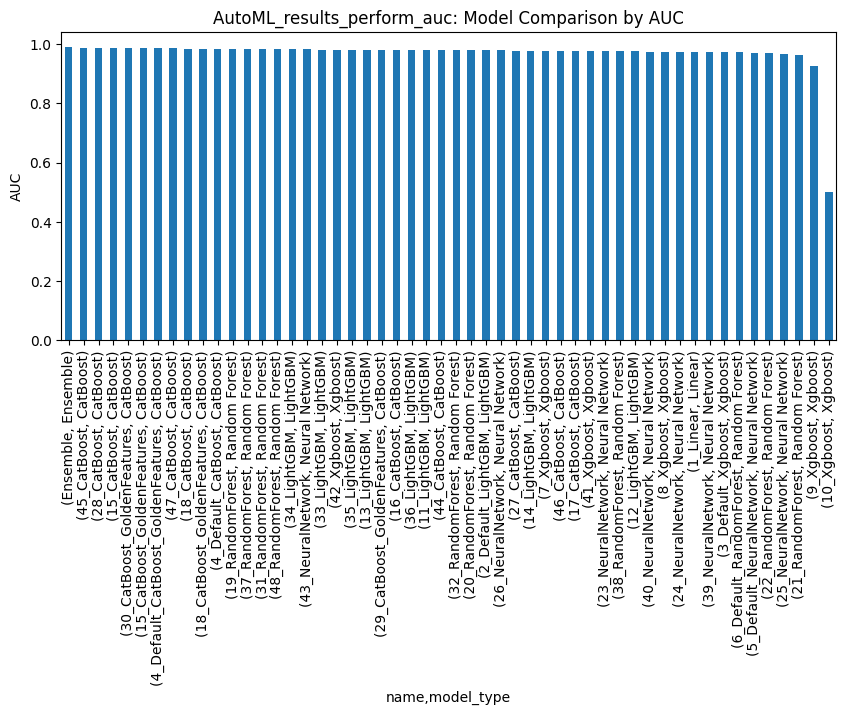

 No Correlation Heatmap.

 Analyzing results in: AutoML_results_perform_accuracy

Metric Table:


,metric_type,accuracy
name,model_type,
10_Xgboost,Xgboost,0.502183
11_LightGBM,LightGBM,0.938865
12_LightGBM,LightGBM,0.967249
13_LightGBM,LightGBM,0.967249
13_LightGBM_GoldenFeatures,LightGBM,0.956332
14_LightGBM,LightGBM,0.967249
14_LightGBM_GoldenFeatures,LightGBM,0.962882
15_CatBoost,CatBoost,0.965066
16_CatBoost,CatBoost,0.962882


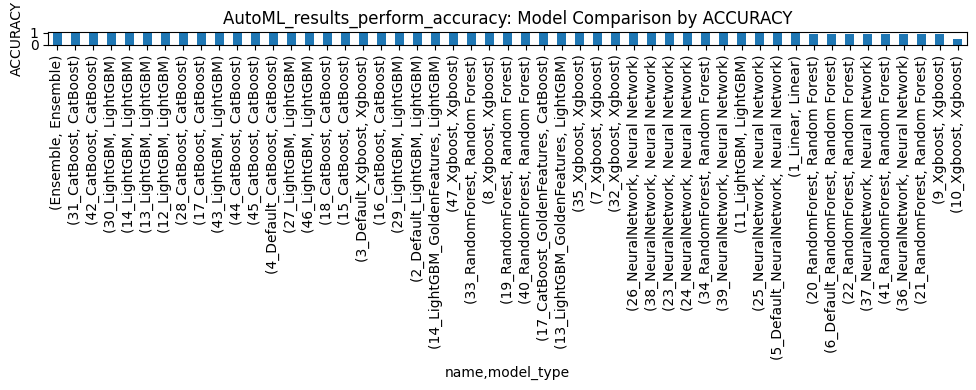

 No Correlation Heatmap.
[ X ] AutoML_results_perform_precision → No leaderboard.csv . pass.
[ X ] AutoML_results_perform_recall → No leaderboard.csv . pass.


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import glob

# Specify folders where multiple metric experiment results are stored 
results_folders = [
    "AutoML_results_perform_logloss",
    "AutoML_results_perform_f1",
    "AutoML_results_perform_auc",
    "AutoML_results_perform_accuracy",
    "AutoML_results_perform_precision",
    "AutoML_results_perform_recall"
]

for results_path in results_folders:
    if not os.path.exists(os.path.join(results_path, "leaderboard.csv")):
        print(f"[ X ] {results_path} → No leaderboard.csv . pass.")
        continue

    print(f"\n Analyzing results in: {results_path}\n")

    # 1. Load Leaderboard
    leaderboard = pd.read_csv(os.path.join(results_path, "leaderboard.csv"))

    # 2. Check metric_type type and pivot
    metric_types = leaderboard["metric_type"].unique()
    pivot = leaderboard.pivot_table(index=["name", "model_type"], 
                                     columns="metric_type", 
                                     values="metric_value")
    print("Metric Table:")
    display(pivot)

    # 3.Visualize performance by metric
    for metric in metric_types:
        if metric in pivot.columns:
            pivot[metric].sort_values(ascending=False).plot(kind="bar", figsize=(10, 4), title=f"{results_path}: Model Comparison by {metric.upper()}")
            plt.ylabel(metric.upper())
            plt.tight_layout()
            plt.show()

    # 4. Importance Image Visualization
    importance_imgs = glob.glob(os.path.join(results_path, "*", "importance.png"))
    for img_path in importance_imgs:
        model_name = os.path.basename(os.path.dirname(img_path))
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{results_path} - {model_name} (Importance)")
        plt.show()

    # 5. Correlation Heatmap
    corr_path = os.path.join(results_path, "correlation_matrix.csv")
    if os.path.exists(corr_path):
        corr_df = pd.read_csv(corr_path, index_col=0)
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_df, annot=True, cmap="coolwarm")
        plt.title(f"{results_path} - Feature Correlation")
        plt.tight_layout()
        plt.show()
    else:
        print(" No Correlation Heatmap.")


### Compete Mode


Analyzing COMPETE MODE : AutoML_results_compete_logloss

Metric Table:


,metric_type,logloss
name,model_type,
10_Default_ExtraTrees,Extra Trees,0.193979
11_Default_NearestNeighbors,Nearest Neighbors,0.447072
12_Xgboost,Xgboost,0.163252
13_Xgboost,Xgboost,0.132156
14_Xgboost,Xgboost,0.299213
...,...,...
85_CatBoost,CatBoost,0.105910
86_CatBoost,CatBoost,0.096403
8_Default_NeuralNetwork,Neural Network,0.187465


C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\2875726792.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


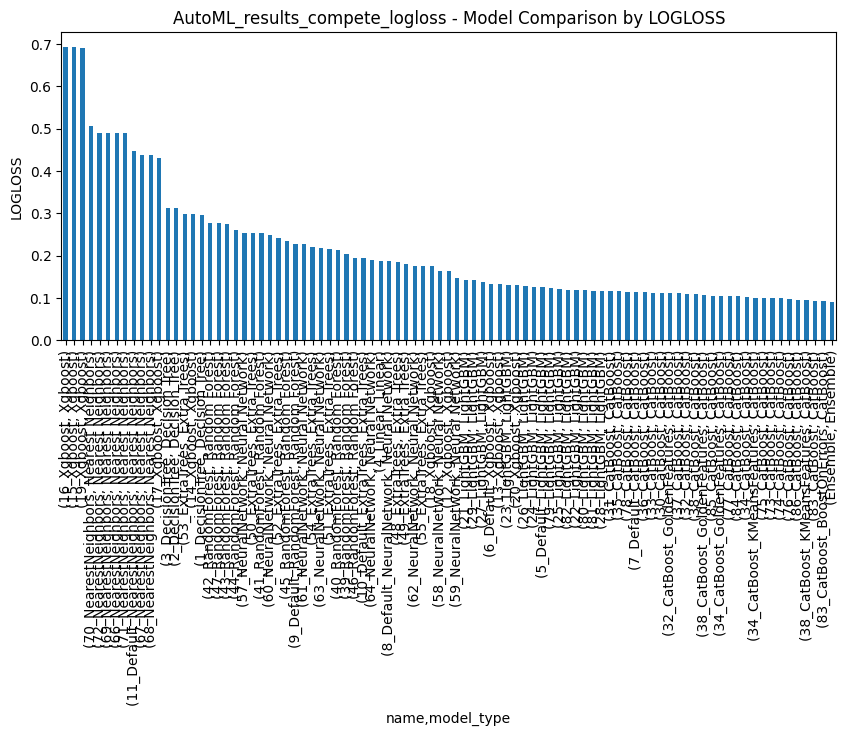


 No correlation heatmap

Analyzing COMPETE MODE : AutoML_results_compete_f1

Metric Table:


,metric_type,f1
name,model_type,
100_LightGBM,LightGBM,0.969027
101_Xgboost,Xgboost,0.960177
102_RandomForest,Random Forest,0.942982
10_Default_ExtraTrees,Extra Trees,0.926407
11_Default_NearestNeighbors,Nearest Neighbors,0.912442
...,...,...
97_DecisionTree,Decision Tree,0.905579
98_DecisionTree,Decision Tree,0.905579
99_DecisionTree,Decision Tree,0.866953


C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\2875726792.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


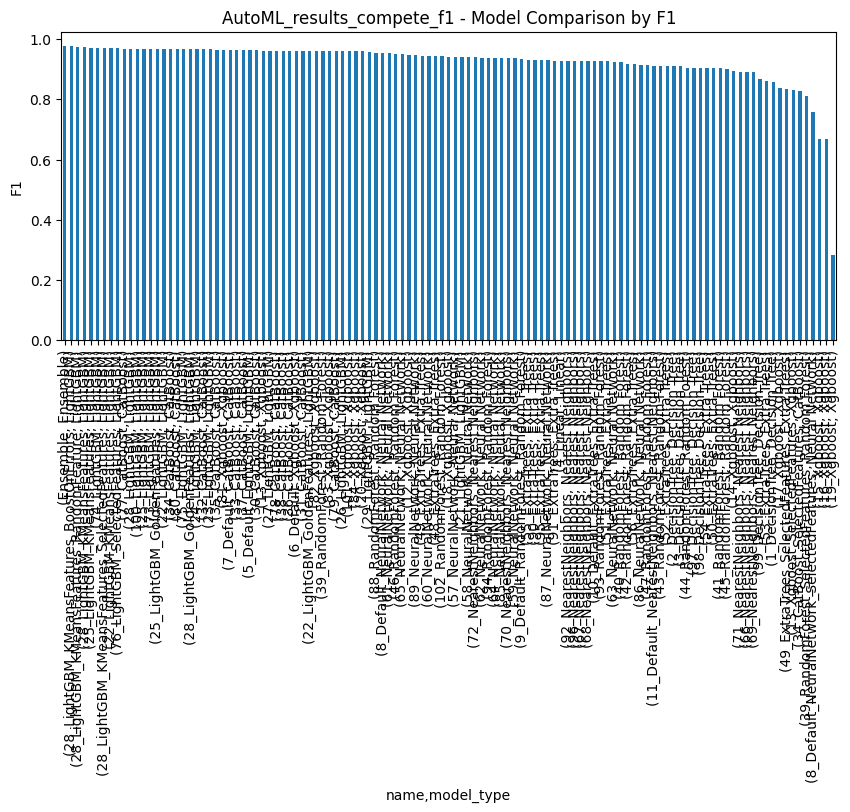


 No correlation heatmap

Analyzing COMPETE MODE : AutoML_results_compete_auc

Metric Table:


,metric_type,auc
name,model_type,
100_CatBoost,CatBoost,0.978795
101_CatBoost,CatBoost,0.989007
101_CatBoost_BoostOnErrors,CatBoost,0.977670
102_CatBoost,CatBoost,0.972159
103_CatBoost,CatBoost,0.977918
...,...,...
97_Xgboost,Xgboost,0.974657
98_NearestNeighbors,Nearest Neighbors,0.966286
99_DecisionTree,Decision Tree,0.860491


C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\2875726792.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


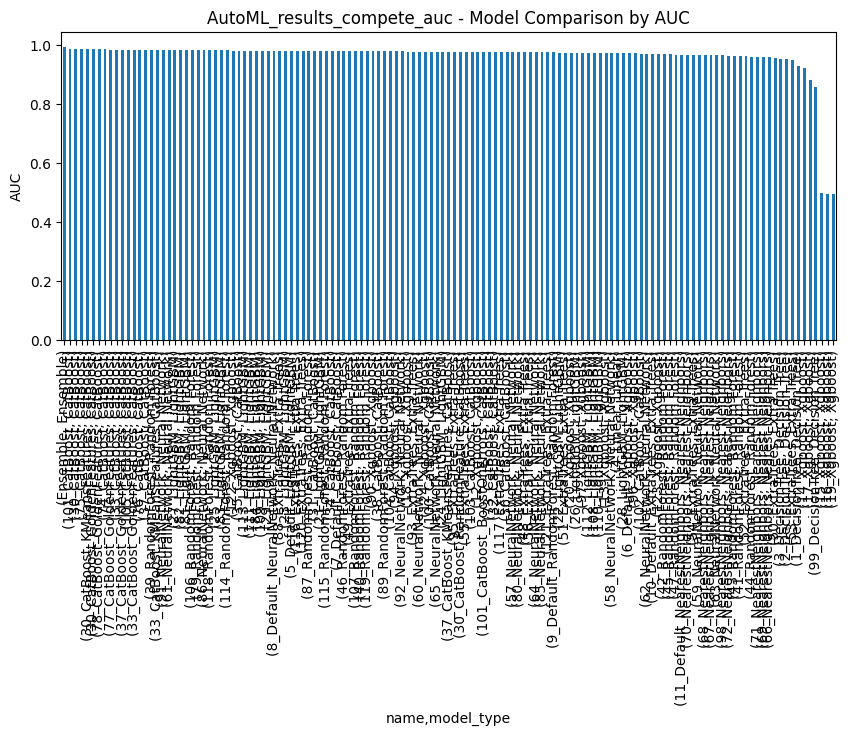


 No correlation heatmap

Analyzing COMPETE MODE : AutoML_results_compete_accuracy

Metric Table:


,metric_type,accuracy
name,model_type,
100_ExtraTrees,Extra Trees,0.978261
101_ExtraTrees,Extra Trees,0.934783
102_DecisionTree,Decision Tree,0.934783
103_DecisionTree,Decision Tree,0.934783
104_DecisionTree,Decision Tree,0.913043
...,...,...
97_ExtraTrees,Extra Trees,0.956522
98_NeuralNetwork,Neural Network,0.978261
99_NeuralNetwork,Neural Network,0.956522


C:\Users\jin89\AppData\Local\Temp\ipykernel_19720\2875726792.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.


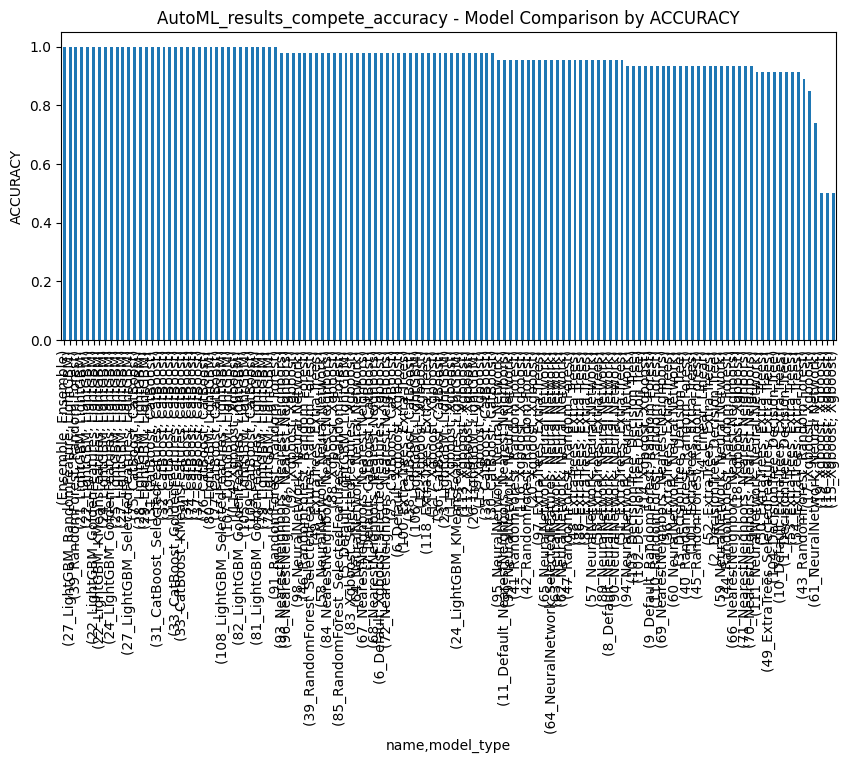


 No correlation heatmap
[ X ] AutoML_results_compete_precision → No leaderboard.csv . pass
[ X ] AutoML_results_compete_recall → No leaderboard.csv . pass


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import glob

# List of folders tested against multiple metrics in Compete mode
results_folders = [
    "AutoML_results_compete_logloss",
    "AutoML_results_compete_f1",
    "AutoML_results_compete_auc",
    "AutoML_results_compete_accuracy",
    "AutoML_results_compete_precision",
    "AutoML_results_compete_recall"
]

for results_path in results_folders:
    if not os.path.exists(os.path.join(results_path, "leaderboard.csv")):
        print(f"[ X ] {results_path} → No leaderboard.csv . pass")
        continue

    print(f"\nAnalyzing COMPETE MODE : {results_path}\n")

    # 1. Load the leaderboard
    leaderboard = pd.read_csv(os.path.join(results_path, "leaderboard.csv"))

    # 2. metric_type type and pivot table creation
    metric_types = leaderboard["metric_type"].unique()
    pivot = leaderboard.pivot_table(index=["name", "model_type"], 
                                     columns="metric_type", 
                                     values="metric_value")
    print("Metric Table:")
    display(pivot)

    # 3. Visualize performance by metric
    for metric in metric_types:
        if metric in pivot.columns:
            pivot[metric].sort_values(ascending=False).plot(
                kind="bar", figsize=(10, 4),
                title=f"{results_path} - Model Comparison by {metric.upper()}"
            )
            plt.ylabel(metric.upper())
            plt.tight_layout()
            plt.show()

    # 4. Importance image visualization (if available)
    importance_imgs = glob.glob(os.path.join(results_path, "*", "importance.png"))
    for img_path in importance_imgs:
        model_name = os.path.basename(os.path.dirname(img_path))
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{results_path} - {model_name} (Importance)")
        plt.show()

    # 5. Output correlation heatmap (if available)
    corr_path = os.path.join(results_path, "correlation_matrix.csv")
    if os.path.exists(corr_path):
        corr_df = pd.read_csv(corr_path, index_col=0)
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_df, annot=True, cmap="coolwarm")
        plt.title(f"{results_path} - Feature Correlation")
        plt.tight_layout()
        plt.show()
    else:
        print("\n No correlation heatmap")


In [136]:
print(leaderboard.columns)

Index(['name', 'model_type', 'metric_type', 'metric_value', 'train_time'], dtype='object')
